# Text Clustering and Classification

In [1]:
from datasets import load_dataset

ds = load_dataset('billingsmoore/GNOME-bo-en', split='train')['target']

ds[0]

README.md:   0%|          | 0.00/308 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/270k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5877 [00:00<?, ? examples/s]

'Run Software'

## Clustering

In [2]:
from easy_text_clustering.clusterer import ClusterClassifier
import pandas as pd

cc = ClusterClassifier(embed_device='cuda')
cc.fit(ds)


INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
/home/j/Documents/MLotsawa/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
INFO:root:Embedding texts...


Batches:   0%|          | 0/92 [00:00<?, ?it/s]

INFO:root:Building FAISS index...
INFO:root:Projecting with umap...
INFO:root:Clustering...
INFO:root:Summarizing cluster centers...


Using HDBSCAN params={}
Request:
<s>[INST]Example 1:
Start the drive associated with the open folder

Example 2:
Connect to the drive associated with the open folder

Example 3:
Start the multi-disk drive associated with the open folder

Example 4:
Start the multi-disk drive associated with the open folder

Example 5:
Start the multi-disk drive associated with the open folder

Example 6:
Start the multi-disk drive associated with the open folder

Example 7:
Start the multi-disk drive associated with the open folder

Example 8:
Connect to the drive associated with the open folder

Example 9:
Start the multi-disk drive associated with the open folder

Example 10:
Connect to the drive associated with the open folder

Use three words total (comma separated)to describe general topics in above texts. Under no circumstances use enumeration. Example format: Tree, Cat, Fireman[/INST]
Number of clusters is 594


In [4]:
cc.optimize_fit()

[I 2025-02-02 16:53:20,404] A new study created in memory with name: no-name-7793602e-10f4-46ca-a3a3-a9fef14c0f81
/home/j/Documents/MLotsawa/.venv/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
[I 2025-02-02 16:53:28,740] Trial 0 finished with value: 2.444074948157792 and parameters: {'umap_n_neighbors': 9, 'umap_min_dist': 0.5649485997321481, 'hdbscan_min_cluster_size': 28, 'cluster_selection_epsilon': 0.6371209938922837}. Best is trial 0 with value: 2.444074948157792.
[I 2025-02-02 16:53:32,514] Trial 1 finished with value: 2.2223298083357705 and parameters: {'umap_n_neighbors': 30, 'umap_min_dist': 0.29774197259935087, 'hdbscan_min_cluster_size': 84, 'cluster_selection_epsilon': 0.9891250335361289}. Best is trial 0 with value: 2.444074948157792.
[I 2025-02-02 16:

Using HDBSCAN params={'cluster_selection_method': 'leaf', 'min_cluster_size': 29, 'metric': 'euclidean', 'cluster_selection_epsilon': 0.8492372447589254}
Request:
<s>[INST]Example 1:
Default column order in the list view.

Example 2:
Choose the order of information to appear in the list view.

Example 3:
Default column order in the list view.

Example 4:
Choose the order of information to appear in the list view.

Example 5:
Choose the order of information to appear in the list view.

Example 6:
Default sort order

Example 7:
Default column order in the list view.

Example 8:
Choose the order of information to appear in this folder:

Example 9:
Choose the order of information to appear in the list view.

Example 10:
Default sort order

Use three words total (comma separated)to describe general topics in above texts. Under no circumstances use enumeration. Example format: Tree, Cat, Fireman[/INST]
Number of clusters is 72


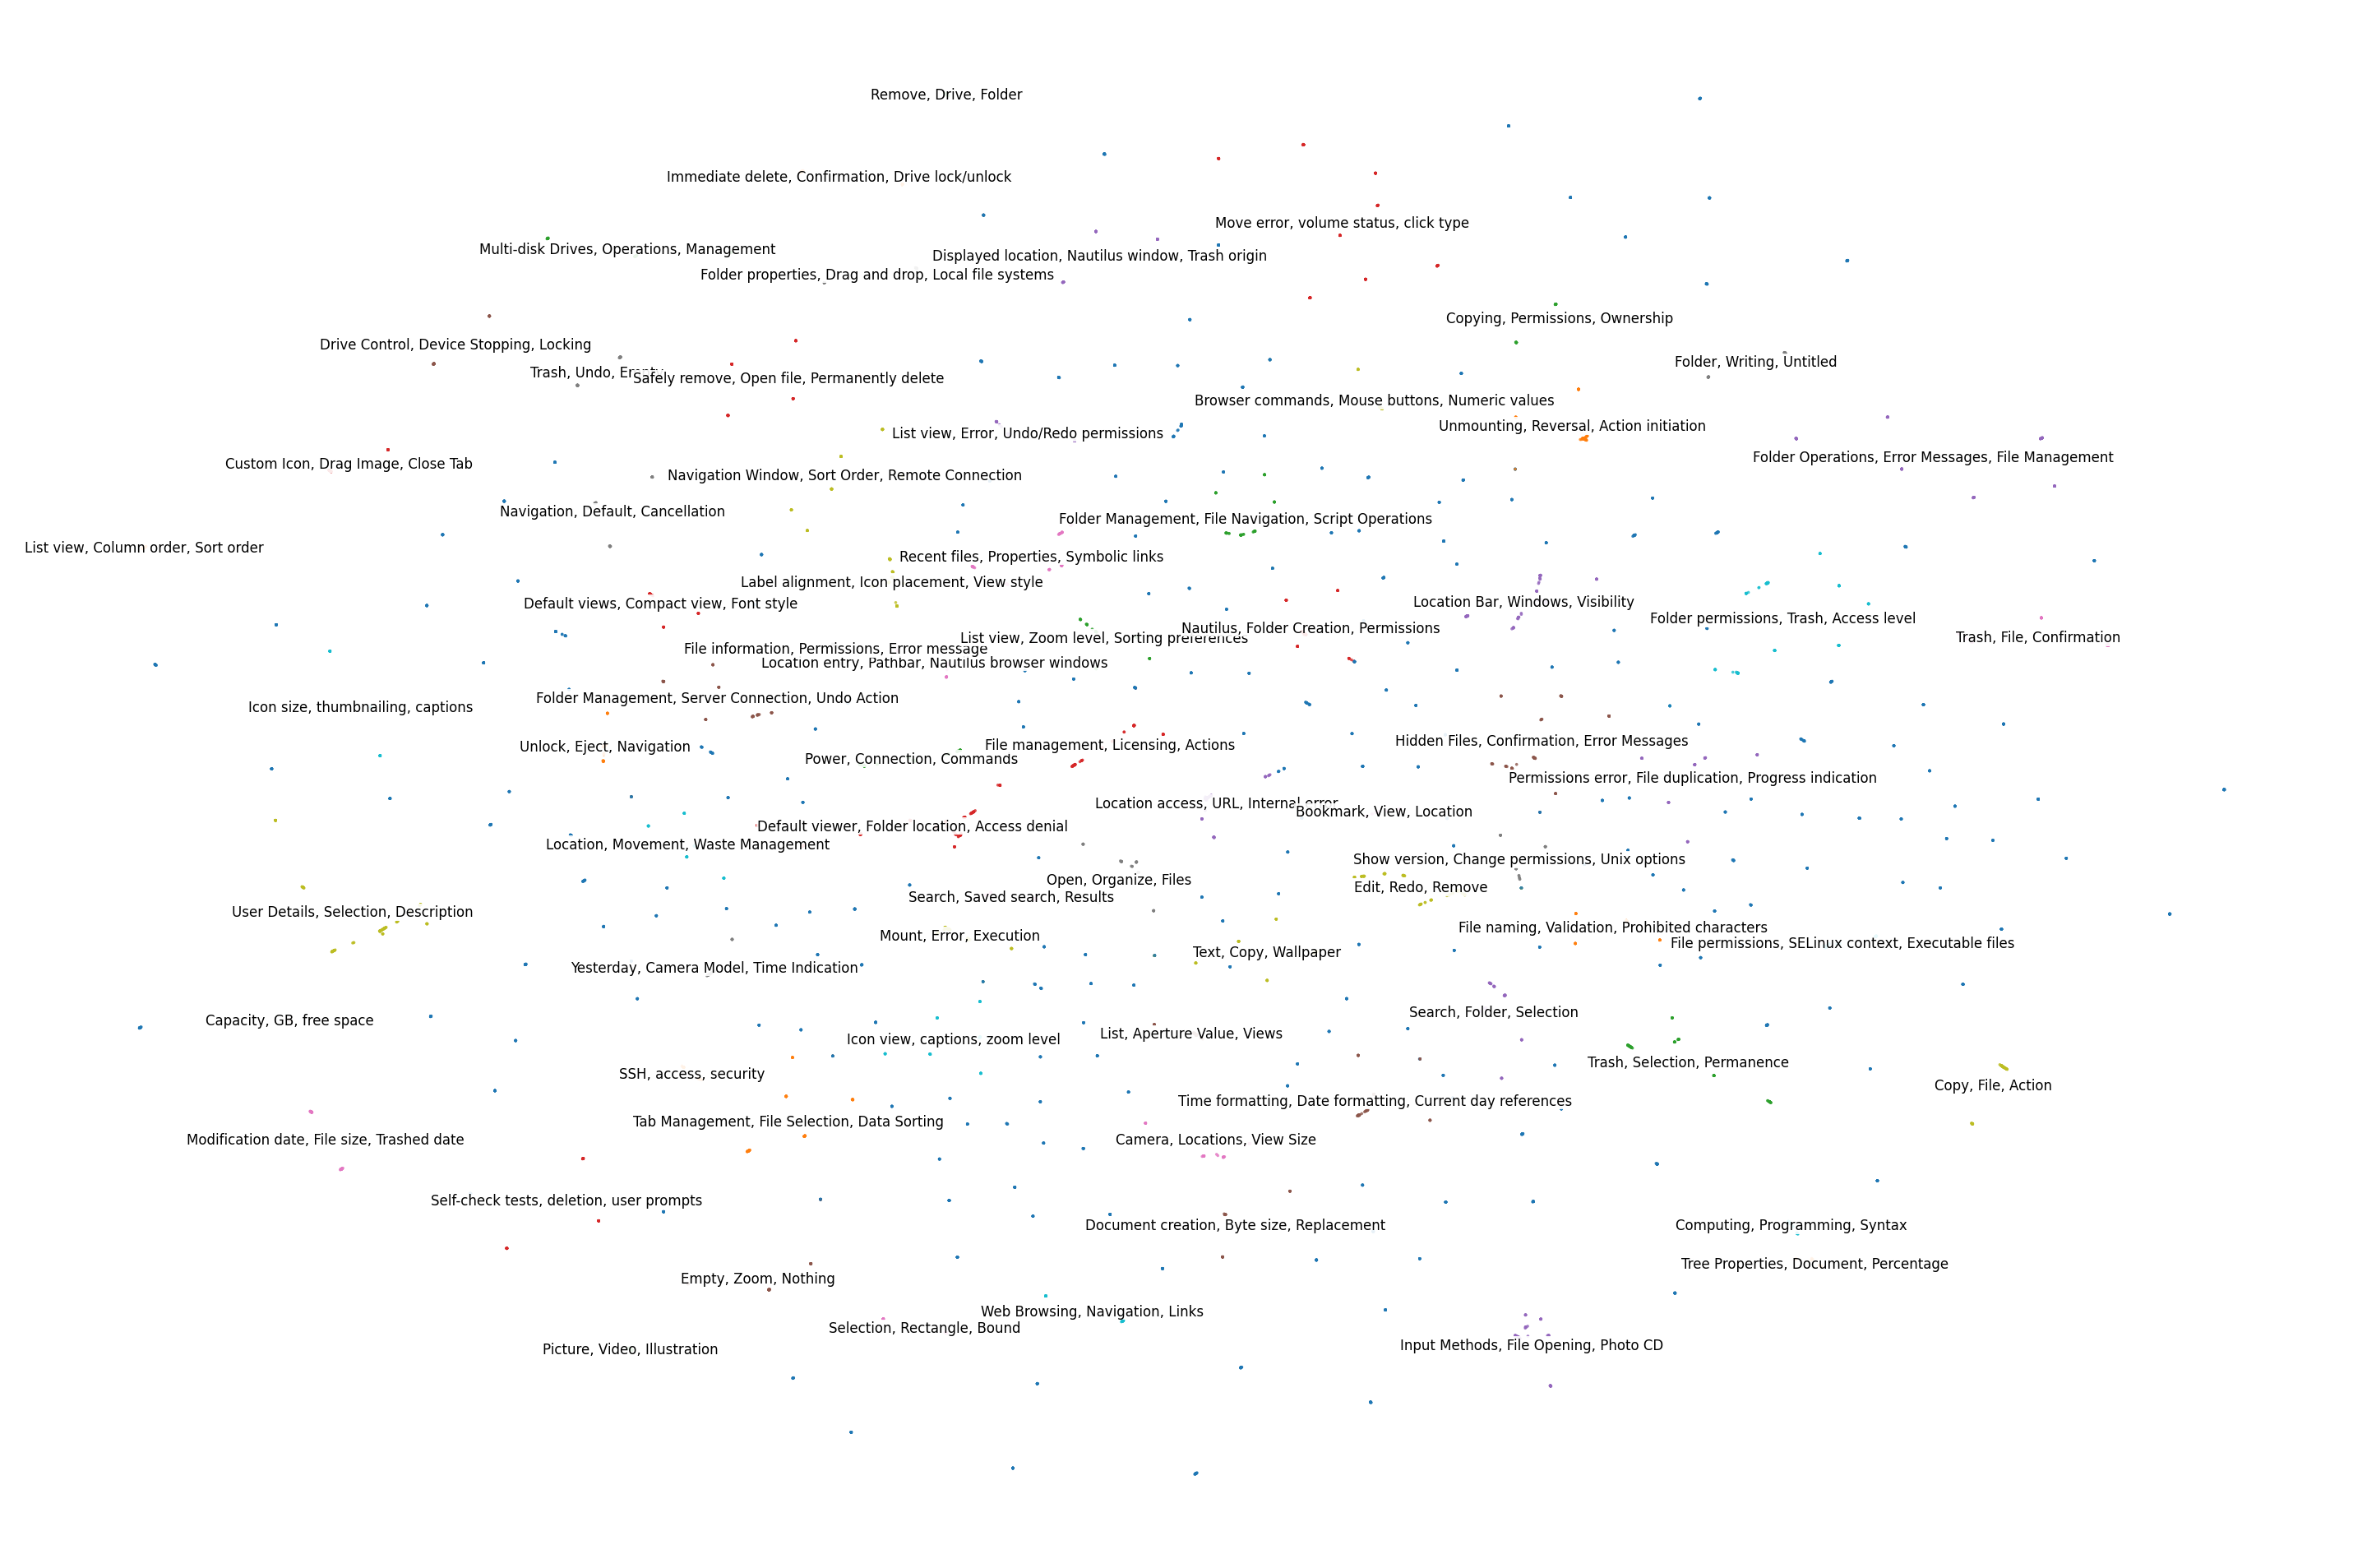

In [5]:
cc.show()

In [6]:
cc.cluster_summaries

{-1: 'None',
 0: 'List view, Column order, Sort order',
 1: 'Remove, Drive, Folder',
 2: 'Custom Icon, Drag Image, Close Tab',
 3: 'Input Methods, File Opening, Photo CD',
 4: 'Drive Control, Device Stopping, Locking',
 5: 'Modification date, File size, Trashed date',
 6: 'Folder, Writing, Untitled',
 7: 'Copy, File, Action',
 8: 'Computing, Programming, Syntax',
 9: 'Tree Properties, Document, Percentage',
 10: 'Picture, Video, Illustration',
 11: 'Self-check tests, deletion, user prompts',
 12: 'Displayed location, Nautilus window, Trash origin',
 13: 'Capacity, GB, free space',
 14: 'Selection, Rectangle, Bound',
 15: 'Trash, Undo, Empty',
 16: 'User Details, Selection, Description',
 17: 'Icon size, thumbnailing, captions',
 18: 'Immediate delete, Confirmation, Drive lock/unlock',
 19: 'Multi-disk Drives, Operations, Management',
 20: 'Move error, volume status, click type',
 21: 'Folder Operations, Error Messages, File Management',
 22: 'Empty, Zoom, Nothing',
 23: 'Trash, File, C

In [7]:
cc.cluster_labels

array([41, 49,  3, ..., -1, 53, -1])

In [8]:
summaries = [cc.cluster_summaries[label] for label in cc.cluster_labels]

In [9]:
full_ds = load_dataset('billingsmoore/GNOME-bo-en', split='train')

In [10]:
full_ds[0]

{'source': 'མཉེན་ཆས', 'target': 'Run Software'}

In [11]:
df = full_ds.to_pandas()
df.head()

,source,target
0,མཉེན་ཆས,Run Software
1,ཞབས་ཞུ་བ་དང་སྦྲེལ་མཐུད་བྱེད་པ,Connect to Server
2,ཡིག་ཆ(_F),Files
3,ཡིག་ཆ་འདྲི་ཞིབ,Access and organize files
4,ཉར་ཡོད་པའི་འཚོལ་བཤེར,Saved search


In [12]:
df['topic'] = summaries

In [13]:
df.head()

,source,target,topic
0,མཉེན་ཆས,Run Software,"Recent files, Properties, Symbolic links"
1,ཞབས་ཞུ་བ་དང་སྦྲེལ་མཐུད་བྱེད་པ,Connect to Server,"Folder Management, Server Connection, Undo Action"
2,ཡིག་ཆ(_F),Files,"Input Methods, File Opening, Photo CD"
3,ཡིག་ཆ་འདྲི་ཞིབ,Access and organize files,"Open, Organize, Files"
4,ཉར་ཡོད་པའི་འཚོལ་བཤེར,Saved search,"Search, Saved search, Results"


In [14]:
from datasets import Dataset

labeled_ds = Dataset.from_pandas(df)

In [15]:
labeled_ds[0]

{'source': 'མཉེན་ཆས',
 'target': 'Run Software',
 'topic': 'Recent files, Properties, Symbolic links'}

In [16]:
labeled_ds.push_to_hub('billingsmoore/GNOME-bo-en')

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/billingsmoore/GNOME-bo-en/commit/4d2a9387566dd88439e6fc6801c0bcb240f01aff', commit_message='Upload dataset', commit_description='', oid='4d2a9387566dd88439e6fc6801c0bcb240f01aff', pr_url=None, pr_revision=None, pr_num=None)